In [1]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()
import warnings
warnings.filterwarnings('ignore')

In [2]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    qc = QuantumCircuit(n, name = name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
        qc.unitary(Operator(oracle_matrix), range(n))
    return qc
       
        
def diffuser(n):
    qc = QuantumCircuit(n, name = 'Diff -V')
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    return qc
    
def Grover(n, marked):
    qc = QuantumCircuit(n, n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis states {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range (r):
        qc.append(phase_oracle(n, marked), range(n))
        qc.append(diffuser(n), range(n))
    return qc

5 qubits, basis states [13] marked, 4 rounds


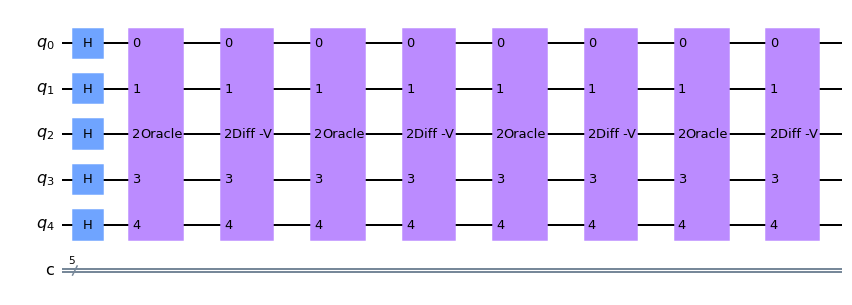

In [3]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)

qc.draw()

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 10000, optimization_level = 1).result()
counts = result.get_counts(qc)
print(counts)
print(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
plot_histogram(counts)

Traceback (most recent call last):
  Input In [4] in <cell line: 3>
    counts = result.get_counts(qc)
  File /opt/conda/lib/python3.8/site-packages/qiskit/result/result.py:289 in get_counts
    raise QiskitError(f'No counts for experiment "{repr(key)}"')
QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fa7e1583820>"'

Use %tb to get the full traceback.


In [5]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y = np.random.randint(2**n)
marked = [x, y]
qc = Grover(n, marked)

backend = least_busy(provider.backends(filters = lambda x : x.configuration().n_qubits >= (n+1) and 
                                       not x.configuration().simulator and x.status().operational == True))
print("Least Busy Backend", backend)
%qiskit_job_watcher
shots = 1024
job = execute(qc, backend = backend, shots = shots, optimization_level = 3)
print(job.job_id())


3 qubits, basis states [7, 5] marked, 1 rounds
Least Busy Backend ibmq_quito


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

63fe40e94b1d564cec57a857
